# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline
load_dotenv()

True

In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
#pip install newsapi-python

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
btc_news

{'status': 'ok',
 'totalResults': 9034,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'David Murphy',
   'title': 'What You Need to Know About Buying Cryptocurrency on PayPal',
   'description': 'Whether you’re looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, you’ll be able to pay various merchants using your cryptocurrency stas…',
   'url': 'https://lifehacker.com/what-you-need-to-know-about-buying-cryptocurrency-on-pa-1846585705',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/qvc2foo4ufow1cbsuk9f.jpg',
   'publishedAt': '2021-03-31T14:00:00Z',
   'content': 'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll

In [6]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")
eth_news

{'status': 'ok',
 'totalResults': 2877,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'David Murphy',
   'title': 'What You Need to Know About Buying Cryptocurrency on PayPal',
   'description': 'Whether you’re looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, you’ll be able to pay various merchants using your cryptocurrency stas…',
   'url': 'https://lifehacker.com/what-you-need-to-know-about-buying-cryptocurrency-on-pa-1846585705',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/qvc2foo4ufow1cbsuk9f.jpg',
   'publishedAt': '2021-03-31T14:00:00Z',
   'content': 'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll

In [7]:
# Create the Bitcoin sentiment scores DataFrame
#from nltk.classify import NaiveBayesClassifier
#from nltk.corpus import subjectivity
#from nltk.sentiment import SentimentAnalyzer
#nltk.download("vader_lexicon")
#from nltk.sentiment.util import *

In [8]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#analyzer = SentimentIntensityAnalyzer()

In [9]:
btc_sentiment = []
for articles in btc_news["articles"]:
    try:
        text = articles["content"]
        #date = articles["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiment.append({
            "text": text,
            #"date": date,
            "compound":compound,
            "positive":pos,
            "negative":neg,
            "neutral":neu
        })
    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiment)
btc_df.head()

,text,compound,positive,negative,neutral
0,Whether youre looking to make a larger investm...,0.0772,0.039,0.0,0.961
1,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.0,0.873
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
3,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865
4,The inevitable has happened: You can now purch...,0.3182,0.065,0.0,0.935


In [10]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment = []
for articles in eth_news["articles"]:
    try:
        text = articles["content"]
        #date = articles["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        
        eth_sentiment.append({
            "text": text,
            #"date": date,
            "compound":compound,
            "positive":pos,
            "negative":neg,
            "neutral":neu
        })

    except AttributeError:
        pass
#eth_df = pd.DataFrame.from_dict(eth_news["articles"])
eth_df = pd.DataFrame(eth_sentiment)
eth_df.head()

,text,compound,positive,negative,neutral
0,Whether youre looking to make a larger investm...,0.0772,0.039,0.0,0.961
1,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.0,0.966
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
3,Payment card network Visa has announced that t...,0.0000,0.000,0.0,1.000
4,"ConsenSys, a key player in crypto and a major ...",0.2732,0.062,0.0,0.938


In [11]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.322240,0.087200,0.01490,0.897850
std,0.304626,0.067576,0.03178,0.080861
min,-0.381800,0.000000,0.00000,0.709000
25%,0.070800,0.047250,0.00000,0.865000
50%,0.329100,0.066500,0.00000,0.926500
75%,0.591300,0.129000,0.00000,0.940250
max,0.771700,0.240000,0.10200,1.000000


In [12]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.003550,0.037550,0.035350,0.927100
std,0.333481,0.054729,0.045399,0.074754
min,-0.571900,0.000000,0.000000,0.735000
25%,-0.263525,0.000000,0.000000,0.917750
50%,0.000000,0.000000,0.000000,0.937000
75%,0.126200,0.062500,0.071000,0.974500
max,0.750600,0.172000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fijibot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Expand the default stopwords list if necessary

word_lemm = WordNetLemmatizer()

stop_words = set(stopwords.words("english"))
#result = [word.lower() for word in word if word.lower() not in stop_words]
#print(result)
#stop_words = set(stop_words)
#stop_words.append("char")
#stop_words.append("#")
#stop_words.append("ain't")
#stop_words.append("don't")
#stop_words.append("won't")
#stop_words.append("can't")
#stop_words.append("you're")
#stop_words.append("u")
#stop_words.append("'s")
#stop_word = set(stop_words)

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    word_list = word_tokenize(text)
    # Convert the words to lowercase
    word_list = text.lower()
    # Remove the punctuation
    #word_list[text] = text.apply(
        #lambda x:''.join([i for i in x if i not in string.punctuation]))
    #eth_df[text] = eth_df.apply(
     #   lambda x:''.join([i for i in x if i not in string.punctuation]))
    #word_list = text.replace(",","")
    #word_list = text.replace(".", "")
    #word_list = text.replace("?", "")
    #word_list = text.replace("!", "")
    
    # Remove the stop words
    word_list = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return "".join(text)
    # Lemmatize Words into root words
    tokens = [word_lemm.lemmatize for word in word_list]
    return tokens


In [16]:
#import string
#string = "string. With. Punctuation?" 
#out = string.translate(string.maketrans("",""), string.punctuation)

In [17]:
# Create a new tokens column for bitcoin
btc_df["tokens"]=btc_df.text.apply(tokenizer)
#btc_df["tokens"]=btc_df.text(tokenizer)
btc_df.head()

,text,compound,positive,negative,neutral,tokens
0,Whether youre looking to make a larger investm...,0.0772,0.039,0.0,0.961,Whether youre looking to make a larger investm...
1,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.0,0.873,"As it promised earlier this year, Tesla now ac..."
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829,Cryptocurrency continues to gain mainstream ac...
3,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865,The crypto industry as a whole has seen a mome...
4,The inevitable has happened: You can now purch...,0.3182,0.065,0.0,0.935,The inevitable has happened: You can now purch...


In [18]:
# Create a new tokens column for ethereum
eth_df["tokens"]=eth_df.text.apply(tokenizer)
btc_df.head()

,text,compound,positive,negative,neutral,tokens
0,Whether youre looking to make a larger investm...,0.0772,0.039,0.0,0.961,Whether youre looking to make a larger investm...
1,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.0,0.873,"As it promised earlier this year, Tesla now ac..."
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829,Cryptocurrency continues to gain mainstream ac...
3,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865,The crypto industry as a whole has seen a mome...
4,The inevitable has happened: You can now purch...,0.3182,0.065,0.0,0.935,The inevitable has happened: You can now purch...


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
N=2
btc_ngrams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(btc_ngrams).most_common(10)

[(('e', ' '), 89),
 (('i', 'n'), 85),
 (('s', ' '), 82),
 ((' ', 't'), 79),
 ((' ', 'a'), 66),
 (('t', 'h'), 63),
 (('n', ' '), 62),
 (('t', ' '), 55),
 ((' ', 'c'), 53),
 (('i', 't'), 51)]

In [21]:
# Generate the Ethereum N-grams where N=2
N=2
eth_ngrams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(eth_ngrams).most_common(10)

[(('e', ' '), 89),
 (('i', 'n'), 85),
 (('s', ' '), 82),
 ((' ', 't'), 79),
 ((' ', 'a'), 66),
 (('t', 'h'), 63),
 (('n', ' '), 62),
 (('t', ' '), 55),
 ((' ', 'c'), 53),
 (('i', 't'), 51)]

In [22]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Get the top 10 words for Bitcoin
btc_token = tokenizer(btc_df.text.str.cat())
token_count(btc_token, 10)
#btc_token

[(' ', 666),
 ('e', 330),
 ('t', 288),
 ('a', 262),
 ('o', 254),
 ('n', 241),
 ('i', 238),
 ('r', 216),
 ('s', 215),
 ('c', 148)]

In [24]:
# Get the top 10 words for Ethereum
eth_token = tokenizer(eth_df.text.str.cat())
token_count(eth_token, 10)
#eth_token

[(' ', 660),
 ('e', 314),
 ('a', 272),
 ('t', 255),
 ('o', 235),
 ('s', 228),
 ('r', 220),
 ('n', 216),
 ('i', 204),
 ('h', 167)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
pip install worldcloud

ERROR: Could not find a version that satisfies the requirement worldcloud
ERROR: No matching distribution found for worldcloud
Note: you may need to restart the kernel to use updated packages.


In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [27]:
# Generate the Bitcoin word cloud
#def wordcloud(text,title""):
#    btc_df = set(stopwords.words("english"))
#    regex = re.compile("[a-zA-z]")
#    re = regex.sub("", doc)
#    lem = [lemmatizer.lemmatize(word) for word in words]
#    output = [word.lower() for word in lem if word.lower() not in stop_btc]
#    return " ".join(output)

#btc = WordCloud()
#btc_wc = wc.generate(btc_df)
#plt.axis("off")
#plt.imshow(btc_wc)

def wordcloud(text, title=""):
    btc_df=WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(btc_df)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}            
    plt.title(title, fontdict=fontdict)
    plt.show()

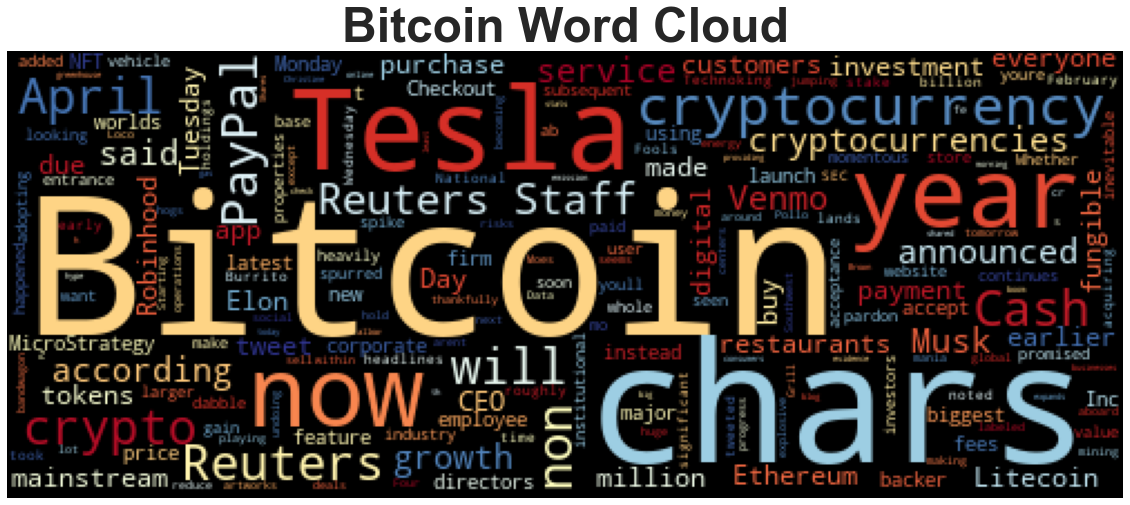

In [28]:
wordcloud(btc_df.text.str.cat(), title="Bitcoin Word Cloud")

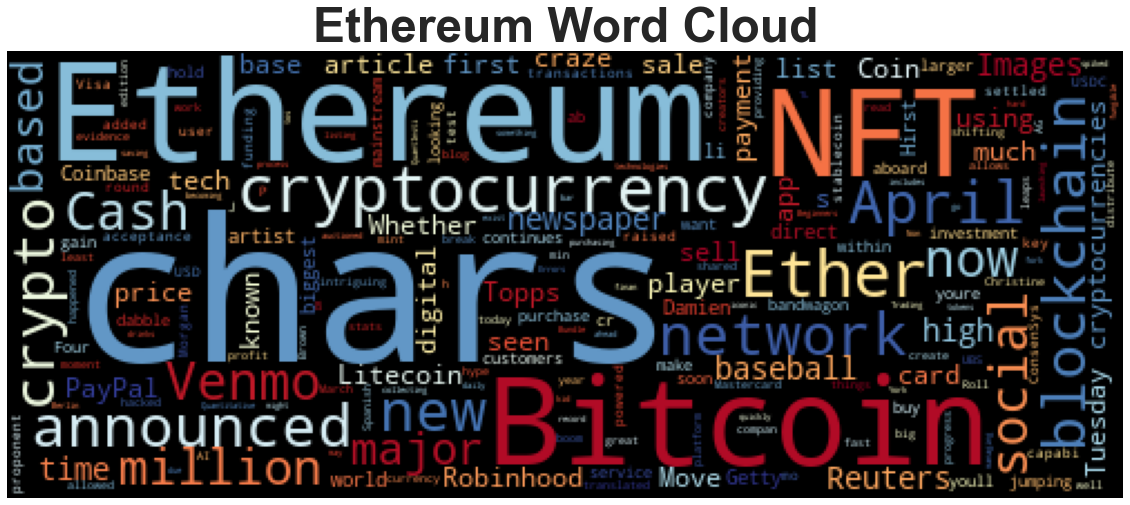

In [29]:
# Generate the Ethereum word cloud
def wordcloud(text, title=""):
    eth_df=WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(eth_df)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}            
    plt.title(title, fontdict=fontdict)
    plt.show()
wordcloud(eth_df.text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [ ]:
#!python -m spacy download en_core_web_sm

In [ ]:
#!pip install spacy

In [ ]:
import spacy
from spacy import displacy
# Problem with Mac M1 Chip and installing Spacy

In [ ]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')
# error with spacy and Mac M1 chip

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
btc_ner = btc_df.text.str.cat()
btc_ner

'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bitcoin due to its store of value properties. The 2020 spike… [+4675 chars]The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon

In [31]:
# Run the NER processor on all of the text
btc_ner_proc = nlp(btc_ner)

# Add a title to the document
btc_ner_proc["title"] = "BTC NER"

NameError: name 'nlp' is not defined

In [32]:
# Render the visualization
displacy.render(text, style = 'ent', jupyter=True)

NameError: name 'displacy' is not defined

In [33]:
# List all Entities
for text in tokens:
    print(text.text,text.pos_,text.head.text)

NameError: name 'tokens' is not defined

## Ethereum NER

In [34]:
# Concatenate all of the ethereum text together
eth_ner = eth_df.text.str.cat()
eth_ner

"Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Payment card network Visa has announced that transactions can be settled using USD Coin (USDC), a stablecoin powered by the Ethereum blockchain. Crypto.com is the first company to test the new capabi… [+2187 chars]ConsenSys, a key player in crypto and a major proponent of the Ethereum blockchain, has raised a\xa0$65 million funding round from\xa

In [35]:
# Run the NER processor on all of the text
eth_ner_proc = nlp(btc_ner)
# Add a title to the document
eth_ner_proc["title"]="ETH NER"

NameError: name 'nlp' is not defined

In [36]:
# Render the visualization
displacy.render(text, style = 'ent', jupyter=True))

SyntaxError: invalid syntax (<ipython-input-36-be399196984d>, line 2)

In [37]:
# List all Entities
for text in tokens:
    print(text.text, text.pos_,text.head.text)

NameError: name 'tokens' is not defined